In [2]:
!pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.optimize import curve_fit
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Alinear transitorios con estímulos
## alínea con los frames

In [3]:
C_traces='/content/drive/MyDrive/Python/Calcio/Shank3_IGF/L1_988_directions_C_traces2.csv'
C=pd.read_csv(C_traces)
C

,time,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.000000,0.000000,0.000000,0.000000,98.618413,0.000000,0.000000,0.000000,0.000000,0.000000,...,158.714956,0.000000,516.832939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.200035,0.000000,0.000000,0.000000,89.347465,0.000000,0.000000,0.000000,0.000000,20.784136,...,146.665078,0.000000,486.067496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.400070,0.000000,0.000000,0.000000,182.862767,0.000000,0.000000,8.470482,0.000000,18.667846,...,135.530051,0.000000,457.133435,0.000000,7.542454,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.600105,0.000000,6.470661,0.000000,283.786847,0.000000,59.783515,7.650801,0.000000,16.767042,...,125.240410,0.000000,429.921729,0.000000,6.503679,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.800140,0.000000,5.836611,0.000000,302.547332,0.000000,53.809129,6.910440,0.000000,47.088261,...,115.731970,0.000000,404.329850,0.000000,31.780015,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,1145.599860,8.594109,58.478484,124.156139,92.735418,49.780899,12.579731,1.021489,2.931724,0.328087,...,4.087968,86.165335,338.013403,172.867170,20.885009,178.836540,3.171597,8.538288,0.000064,140.710720
5728,1145.799895,7.830865,52.748273,112.630470,84.017523,80.056173,11.322593,1.148968,2.373716,0.294681,...,3.777603,75.892006,317.892538,157.205553,18.008647,190.351503,2.945039,7.767858,0.000059,123.176381
5729,1145.999930,7.135405,47.579558,183.577326,129.789326,102.748811,40.228567,1.037783,1.921916,0.264676,...,3.490802,66.843541,298.969400,142.962869,29.045977,196.496226,2.734665,7.066946,0.000055,107.827037
5730,1146.199965,6.501709,74.228064,379.893397,195.947354,96.476370,36.208379,0.937358,1.556109,0.237726,...,3.225775,58.873914,380.472561,130.010555,34.467446,362.715824,2.539318,6.429278,0.000051,94.390427


In [4]:
max_len = len(C)
C.insert(0, 'Frame', range(0, max_len ))

C

,Frame,time,1,2,3,4,5,6,7,8,...,89,90,91,92,93,94,95,96,97,98
0,0,0.000000,0.000000,0.000000,0.000000,98.618413,0.000000,0.000000,0.000000,0.000000,...,158.714956,0.000000,516.832939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.200035,0.000000,0.000000,0.000000,89.347465,0.000000,0.000000,0.000000,0.000000,...,146.665078,0.000000,486.067496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0.400070,0.000000,0.000000,0.000000,182.862767,0.000000,0.000000,8.470482,0.000000,...,135.530051,0.000000,457.133435,0.000000,7.542454,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.600105,0.000000,6.470661,0.000000,283.786847,0.000000,59.783515,7.650801,0.000000,...,125.240410,0.000000,429.921729,0.000000,6.503679,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0.800140,0.000000,5.836611,0.000000,302.547332,0.000000,53.809129,6.910440,0.000000,...,115.731970,0.000000,404.329850,0.000000,31.780015,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,5727,1145.599860,8.594109,58.478484,124.156139,92.735418,49.780899,12.579731,1.021489,2.931724,...,4.087968,86.165335,338.013403,172.867170,20.885009,178.836540,3.171597,8.538288,0.000064,140.710720
5728,5728,1145.799895,7.830865,52.748273,112.630470,84.017523,80.056173,11.322593,1.148968,2.373716,...,3.777603,75.892006,317.892538,157.205553,18.008647,190.351503,2.945039,7.767858,0.000059,123.176381
5729,5729,1145.999930,7.135405,47.579558,183.577326,129.789326,102.748811,40.228567,1.037783,1.921916,...,3.490802,66.843541,298.969400,142.962869,29.045977,196.496226,2.734665,7.066946,0.000055,107.827037
5730,5730,1146.199965,6.501709,74.228064,379.893397,195.947354,96.476370,36.208379,0.937358,1.556109,...,3.225775,58.873914,380.472561,130.010555,34.467446,362.715824,2.539318,6.429278,0.000051,94.390427


In [5]:
stimsnframes = np.load(r'/content/drive/MyDrive/Python/Calcio/Shank3_IGF/L1_988_result.npy')

print(stimsnframes)
stimsnframes.shape

[[[   0.  526.]
  [   0. 1389.]
  [   0. 2046.]
  [   0. 2344.]
  [   0. 3156.]
  [   0. 4225.]
  [   0. 4780.]
  [   0. 5129.]]

 [[  30.  577.]
  [  30. 1183.]
  [  30. 1635.]
  [  30. 2653.]
  [  30. 3208.]
  [  30. 3968.]
  [  30. 4728.]
  [  30. 5335.]]

 [[  60.  217.]
  [  60. 1337.]
  [  60. 1532.]
  [  60. 2395.]
  [  60. 3259.]
  [  60. 3710.]
  [  60. 4677.]
  [  60. 5232.]]

 [[  90.  268.]
  [  90.  977.]
  [  90. 1738.]
  [  90. 2756.]
  [  90. 2898.]
  [  90. 3608.]
  [  90. 4934.]
  [  90. 5592.]]

 [[ 120.  320.]
  [ 120. 1286.]
  [ 120. 2098.]
  [ 120. 2292.]
  [ 120. 3362.]
  [ 120. 4020.]
  [ 120. 4471.]
  [ 120. 5077.]]

 [[ 150.  680.]
  [ 150.  823.]
  [ 150. 1789.]
  [ 150. 2499.]
  [ 150. 3310.]
  [ 150. 3659.]
  [ 150. 4626.]
  [ 150. 5283.]]

 [[ 180.  628.]
  [ 180.  926.]
  [ 180. 1892.]
  [ 180. 2602.]
  [ 180. 3104.]
  [ 180. 3813.]
  [ 180. 4523.]
  [ 180. 5181.]]

 [[ 210.  114.]
  [ 210. 1029.]
  [ 210. 1583.]
  [ 210. 2807.]
  [ 210. 3413.]
  [ 210. 4

(13, 8, 2)

In [6]:
stim_frame = stimsnframes[:, :, 1].flatten()
C_stim_frames = C[C['Frame'].isin(stim_frame)].copy()
tf_stimulus = []

for time_frame in C_stim_frames['Frame']:
    index = np.where(stimsnframes[:, :, 1] == time_frame)[0][0]

    tf_stimulus.append(stimsnframes[index, 0, 0])

if 'Stim' in C_stim_frames.columns:
    C_stim_frames = C_stim_frames.drop(columns=['Stim'])

C_stim_frames['Stim'] = tf_stimulus
cols = ['Frame', 'Stim'] + [col for col in C_stim_frames.columns if col not in ['Frame', 'Stim']]
C_stim_frames = C_stim_frames[cols]

C_stim_frames

,Frame,Stim,time,1,2,3,4,5,6,7,...,89,90,91,92,93,94,95,96,97,98
62,62,330.0,12.402164,517.354639,0.105744,0.000000,37.149153,6.072857,543.148091,10.169523,...,2.431463e+02,8.661128,337.526990,6.410677,6.160086,5.365032e+02,51.691815,3.037140,104.075806,3.741094
114,114,210.0,22.803978,4.106293,102.400030,0.000000,126.326047,141.026372,137.350395,19.222176,...,2.096523e+02,2.989437,128.375093,21.050458,12.040120,3.631418e+01,1.095725,32.012273,36.154576,1.437387
165,165,360.0,33.005758,0.035769,98.978720,43.139549,43.752066,106.130961,7.740019,0.654714,...,4.118688e+02,183.115555,859.329707,101.022136,0.692821,4.189858e+01,107.353736,94.514218,63.987374,0.001621
217,217,60.0,43.407573,0.000284,117.757776,133.246210,295.892097,114.975272,41.121761,25.405078,...,1.811530e+01,18.359315,124.392607,9.580563,7.590092,5.348174e+00,2.275606,6.228882,1.437865,0.838700
268,268,90.0,53.609353,0.000002,419.624790,273.458878,322.313275,22.430922,6.457019,0.926318,...,1.885236e+01,0.311710,5.438270,0.075494,1.181515,2.221996e-01,0.051947,0.050103,0.034757,0.000946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5438,5438,210.0,1087.789775,0.000007,38.913414,5.568842,208.082050,29.114994,6.006783,1.083970,...,2.265222e-07,13.870201,409.224023,47.121231,1.381036,1.936959e-04,9.321421,3.631778,0.618743,2.520013
5489,5489,360.0,1097.991555,825.569595,0.202264,0.038711,27.567159,33.759471,0.027967,1.119660,...,1.729225e+02,25.311295,449.203558,29.304345,0.095250,8.047450e-06,151.519513,0.029213,0.014957,12.005367
5540,5540,330.0,1108.193334,7.191283,0.001051,3.644172,5.234180,0.942696,14.440477,0.006235,...,3.083220e+00,0.039026,88.913668,0.230917,0.111228,3.343459e-07,63.650698,0.000235,7.563419,0.013539
5592,5592,90.0,1118.595149,0.057078,1.591901,1.459064,9.669998,11.707624,1.569402,0.411817,...,5.080028e-02,56.854005,59.195838,0.001655,0.010137,1.305107e-08,99.559360,6.515033,1.211551,0.508708


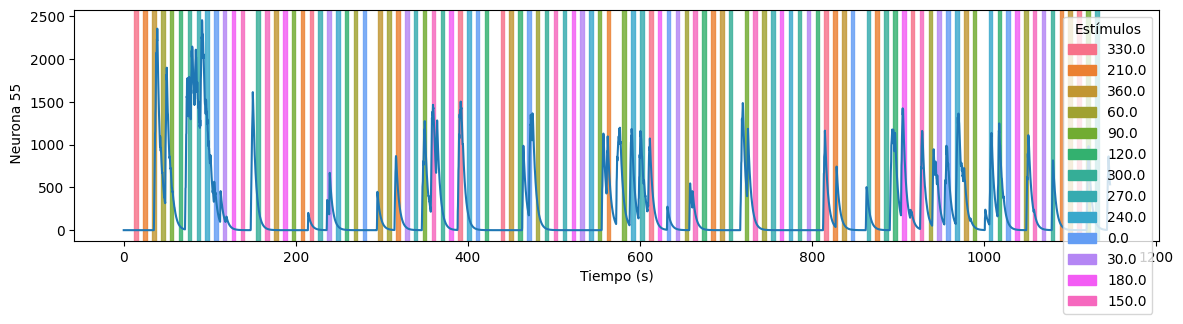

In [7]:
duracion_estimulo = 4

C_stim_frames['End_time'] = C_stim_frames['time'] + duracion_estimulo
columnas = [col for col in C_stim_frames.columns if col != 'End_time']
columnas.insert(3, 'End_time')
C_stim_frames = C_stim_frames[columnas]

columnas = [col for col in C_stim_frames.columns if col != 'End_time']
columnas.insert(3, 'End_time')
C_stim_frames = C_stim_frames[columnas]
C_stim_frames.columns
colors = sns.color_palette("husl", 13)  #<-- Cambia a la cantidad de estimulos
stimuli = C_stim_frames['Stim'].unique()
color_map = dict(zip(stimuli, colors))

neurona='55'
plt.figure(figsize=(14, 3))
sns.lineplot(data=C,x='time', y=neurona)# Y es el número de neurona a graficar
plt.xlabel('Tiempo (s)')
plt.ylabel(f' Neurona {neurona}')
for stimulus in stimuli:
    stimulus_times = C_stim_frames[C_stim_frames['Stim'] == stimulus]['time'].values  # Tiempo de cada estímulo

    for start in stimulus_times:
        end = start + 4  # Duración del estimulo
        plt.axvspan(start, end, color=color_map[stimulus], alpha=0.8)

handles = [mpatches.Patch(color=color_map[stimulus], label=stimulus) for stimulus in stimuli]
plt.legend(handles=handles, title="Estímulos",  loc='upper right')

plt.show()

In [8]:
C_stim_frames.columns

Index(['Frame', 'Stim', 'time', 'End_time', '1', '2', '3', '4', '5', '6',
       ...
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98'],
      dtype='object', length=102)

In [9]:
C_stim_frames

,Frame,Stim,time,End_time,1,2,3,4,5,6,...,89,90,91,92,93,94,95,96,97,98
62,62,330.0,12.402164,16.402164,517.354639,0.105744,0.000000,37.149153,6.072857,543.148091,...,2.431463e+02,8.661128,337.526990,6.410677,6.160086,5.365032e+02,51.691815,3.037140,104.075806,3.741094
114,114,210.0,22.803978,26.803978,4.106293,102.400030,0.000000,126.326047,141.026372,137.350395,...,2.096523e+02,2.989437,128.375093,21.050458,12.040120,3.631418e+01,1.095725,32.012273,36.154576,1.437387
165,165,360.0,33.005758,37.005758,0.035769,98.978720,43.139549,43.752066,106.130961,7.740019,...,4.118688e+02,183.115555,859.329707,101.022136,0.692821,4.189858e+01,107.353736,94.514218,63.987374,0.001621
217,217,60.0,43.407573,47.407573,0.000284,117.757776,133.246210,295.892097,114.975272,41.121761,...,1.811530e+01,18.359315,124.392607,9.580563,7.590092,5.348174e+00,2.275606,6.228882,1.437865,0.838700
268,268,90.0,53.609353,57.609353,0.000002,419.624790,273.458878,322.313275,22.430922,6.457019,...,1.885236e+01,0.311710,5.438270,0.075494,1.181515,2.221996e-01,0.051947,0.050103,0.034757,0.000946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5438,5438,210.0,1087.789775,1091.789775,0.000007,38.913414,5.568842,208.082050,29.114994,6.006783,...,2.265222e-07,13.870201,409.224023,47.121231,1.381036,1.936959e-04,9.321421,3.631778,0.618743,2.520013
5489,5489,360.0,1097.991555,1101.991555,825.569595,0.202264,0.038711,27.567159,33.759471,0.027967,...,1.729225e+02,25.311295,449.203558,29.304345,0.095250,8.047450e-06,151.519513,0.029213,0.014957,12.005367
5540,5540,330.0,1108.193334,1112.193334,7.191283,0.001051,3.644172,5.234180,0.942696,14.440477,...,3.083220e+00,0.039026,88.913668,0.230917,0.111228,3.343459e-07,63.650698,0.000235,7.563419,0.013539
5592,5592,90.0,1118.595149,1122.595149,0.057078,1.591901,1.459064,9.669998,11.707624,1.569402,...,5.080028e-02,56.854005,59.195838,0.001655,0.010137,1.305107e-08,99.559360,6.515033,1.211551,0.508708


# Calcular **OSI** Ortiz-Cruz (2022)

In [10]:
# Crear una lista de estímulos únicos
stimuli = C_stim_frames['Stim'].unique()
duracion_basal = 2

neuronas = C_stim_frames.columns[4:]

print(stimuli)
print(neuronas)

[330. 210. 360.  60.  90. 120. 300. 270. 240.   0.  30. 180. 150.]
Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61',
       '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
       '98'],
      dtype='object')


In [11]:
delta_f_f0_vals = {stimulus: {} for stimulus in stimuli}
neuronas_normalizadas = {}


neuronas_moduladas = {stimulus: [] for stimulus in stimuli}

C_stim_frames['End_time'] = C_stim_frames['time'] + duracion_estimulo
time = C['time']
neuronas_normalizadas = {columna: [] for columna in neuronas}

for stimulus in stimuli:
    C_stim_frames_stimulus = C_stim_frames[C_stim_frames['Stim'] == stimulus]

    for columna in neuronas:
        all_basal_activity = []
        all_stim_activity = []

        for _, row in C_stim_frames_stimulus.iterrows():
            start_stim = row['time']
            end_stim = row['End_time']

            basal_mask = (time >= (start_stim - 2)) & (time < start_stim)
            actividad_basal = C.loc[basal_mask, columna].values
            all_basal_activity.extend(actividad_basal)

            stim_mask = (time >= start_stim) & (time < end_stim)
            actividad_estimulo = C.loc[stim_mask, columna].values
            all_stim_activity.extend(actividad_estimulo)

        F0 = np.mean(all_basal_activity) if all_basal_activity else np.nan
        F = np.mean(all_stim_activity) if all_stim_activity else np.nan

        if not np.isnan(F0) and not np.isnan(F):
            delta_F_F0 = (F - F0) / F0

            delta_f_f0_vals[stimulus][columna] = delta_F_F0

            neuronas_normalizadas[columna].append((stimulus, delta_F_F0))
        else:
            neuronas_normalizadas[columna].append((stimulus, np.nan))

print(neuronas_normalizadas)
print(type(neuronas_normalizadas))

{'1': [(330.0, -0.676696790509353), (210.0, -0.39523617113205034), (360.0, -0.6345624290606274), (60.0, 3.6124315636142375), (90.0, -0.3963676801108498), (120.0, -0.6311616847309187), (300.0, 1.592183916090659), (270.0, 0.6357855880962876), (240.0, -0.624294123825325), (0.0, -0.7098513955246718), (30.0, -0.355092425021884), (180.0, 0.6098302091116258), (150.0, 0.7149618836364048)], '2': [(330.0, -0.6658180858067491), (210.0, 0.8176791059313814), (360.0, 0.9275137349848026), (60.0, -0.33163109248626965), (90.0, -0.3701264235135935), (120.0, -0.041799049159792864), (300.0, 0.17007437238619194), (270.0, 0.45777275677225937), (240.0, -0.3534148739360203), (0.0, -0.662901098091358), (30.0, 0.17115992393344856), (180.0, 0.29636578443603595), (150.0, -0.42711331106684336)], '3': [(330.0, -0.2903485513901377), (210.0, 1.359168656035122), (360.0, 1.3708889356732918), (60.0, -0.5006674064849942), (90.0, -0.08140734673193785), (120.0, -0.2572562274206647), (300.0, -0.15028842435933756), (270.0, 0

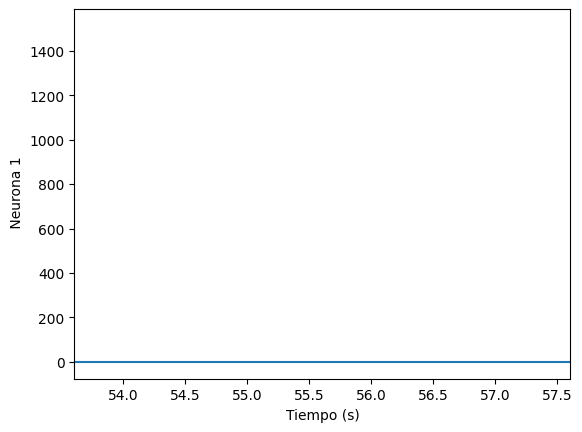

In [12]:
#Check
estimulo_interes = 90.0

# Encuentra el intervalo de tiempo correspondiente a este estímulo
estimulo_row = C_stim_frames[C_stim_frames['Stim'] == estimulo_interes]
if not estimulo_row.empty:
    start_time = estimulo_row['time'].values[0]
    end_time = estimulo_row['End_time'].values[0]

plt.figure()
sns.lineplot(data=C,x='time', y='1')
plt.xlabel('Tiempo (s)')
plt.ylabel(f' Neurona 1')
plt.xlim(start_time, end_time)

for stimulus in stimuli:
    stimulus_times = C_stim_frames[C_stim_frames['Stim'] == stimulus]['time'].values  # Tiempo de cada estímulo

In [13]:
def calcular_osi_dsi(actividades):
    if not isinstance(actividades, dict):
        raise ValueError("El argumento 'actividades' debe ser un diccionario.")

    resultados = {}
    for neurona, respuestas in actividades.items():
        respuestas = [(stim, max(delta_f, 0)) for stim, delta_f in respuestas]


In [14]:
# doble Gaussiana
def doble_gaussiana(theta, b, c, d, a, theta_pref):
    return b + c * np.exp(-((theta - theta_pref) ** 2) / (2 * d ** 2)) + \
           d * np.exp(-((theta - (theta_pref + 180)) ** 2) / (2 * a ** 2))

# calcular R^2
def calcular_r2(y_observado, y_ajustado):
    ss_total = np.sum((y_observado - np.mean(y_observado)) ** 2)
    ss_residual = np.sum((y_observado - y_ajustado) ** 2)
    return 1 - (ss_residual / ss_total)

# Calcular OSI y DSI
def calcular_osi_dsi(actividades):
    resultados = {}

    for neuronas, respuestas in actividades.items():
        respuestas = [(stim, max(delta_f, 0)) for stim, delta_f in respuestas]  # Ajuste a 0
        orientaciones = np.array([stim for stim, _ in respuestas])
        valores = np.array([delta_f for _, delta_f in respuestas])

        # Asegurarse de tener datos válidos para el ajuste
        if len(valores) > 0 and np.all(~np.isnan(valores)):
            # Ajuste de doble Gaussiana
            try:
                popt, _ = curve_fit(doble_gaussiana, orientaciones, valores, p0=[0, max(valores), 1, 45, orientaciones[np.argmax(valores)]])
                valores_ajustados = doble_gaussiana(orientaciones, *popt)

                # Cálculo de R^2
                r2 = calcular_r2(valores, valores_ajustados)

                # OSI y DSI
                R_pref = valores[np.argmax(valores)]
                R_ortho = valores[np.argmin(np.abs(orientaciones - (orientaciones[np.argmax(valores)] + 90)) % 360)]
                R_opuesto = valores[np.argmin(np.abs(orientaciones - (orientaciones[np.argmax(valores)] + 180)) % 360)]

                OSI = (R_pref - R_ortho) / (R_pref + R_ortho)
                DSI = (R_pref - R_opuesto) / (R_pref + R_opuesto)

                resultados[neurona] = {
                    "OSI": OSI,
                    "DSI": DSI,
                    "R^2": r2,
                    "Ajuste": popt
                }
            except RuntimeError:
                resultados[neurona] = {"Error": "Ajuste fallido"}
        else:
            resultados[neurona] = {"Error": "Datos insuficientes o NaN"}

    return resultados



In [15]:
resultados = calcular_osi_dsi(neuronas_normalizadas)
for neurona, datos in resultados.items():
    print(f"Neurona {neurona}: OSI = {datos.get('OSI', 'N/A')}, DSI = {datos.get('DSI', 'N/A')}, R^2 = {datos.get('R^2', 'N/A')}")


<ipython-input-14-412168b2de74>:25: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(doble_gaussiana, orientaciones, valores, p0=[0, max(valores), 1, 45, orientaciones[np.argmax(valores)]])


Neurona 55: OSI = 0.9921040298290447, DSI = 0.9540234026227624, R^2 = 0.9969829745053611


In [16]:
# Función de doble Gaussiana
def doble_gaussiana(theta, b, c, d, a, theta_pref):
    return b + c * np.exp(-((theta - theta_pref) ** 2) / (2 * d ** 2)) + \
           d * np.exp(-((theta - (theta_pref + 180)) ** 2) / (2 * a ** 2))

# Cálculo de OSI y DSI
def calcular_osi_dsi(actividades):
    resultados = {}

    for neurona, respuestas in actividades.items():
        # Ajustar valores negativos a 0
        respuestas = [(stim, max(delta_f, 0)) for stim, delta_f in respuestas]
        orientaciones = np.array([stim for stim, _ in respuestas])
        valores = np.array([delta_f for _, delta_f in respuestas])

        if len(valores) > 0 and np.all(~np.isnan(valores)):
            # Ajuste de doble Gaussiana
            try:
                popt, _ = curve_fit(doble_gaussiana, orientaciones, valores,
                                    p0=[0, max(valores), 1, 45, orientaciones[np.argmax(valores)]])
                valores_ajustados = doble_gaussiana(orientaciones, *popt)

                # Cálculo de R^2
                ss_total = np.sum((valores - np.mean(valores)) ** 2)
                ss_residual = np.sum((valores - valores_ajustados) ** 2)
                r2 = 1 - (ss_residual / ss_total)

                # Identificar R_pref, R_ortho y R_oppo
                theta_pref = popt[4]
                R_pref = max(valores_ajustados)
                R_ortho = valores_ajustados[np.argmin(np.abs(orientaciones - (theta_pref + 90)) % 360)]
                R_oppo = valores_ajustados[np.argmin(np.abs(orientaciones - (theta_pref + 180)) % 360)]

                # Calcular OSI y DSI
                OSI = (R_pref - R_ortho) / (R_pref + R_ortho)
                DSI = (R_pref - R_oppo) / (R_pref + R_oppo)

                resultados[neurona] = {
                    "OSI": OSI,
                    "DSI": DSI,
                    "R^2": r2,
                    "Ajuste": popt
                }
            except RuntimeError:
                resultados[neurona] = {"Error": "Ajuste fallido"}
        else:
            resultados[neurona] = {"Error": "Datos insuficientes o NaN"}

    return resultados



In [17]:
# Llamar a la función
resultados = calcular_osi_dsi(neuronas_normalizadas)

# Mostrar resultados
for neurona, datos in resultados.items():
    print(f"Neurona {neurona}: OSI = {datos.get('OSI', 'N/A')}, DSI = {datos.get('DSI', 'N/A')}, R^2 = {datos.get('R^2', 'N/A')}")


<ipython-input-16-bfb1cdc5be71>:19: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(doble_gaussiana, orientaciones, valores,


Neurona 1: OSI = N/A, DSI = N/A, R^2 = N/A
Neurona 2: OSI = 0.7066563406245625, DSI = 0.7066563406245625, R^2 = 0.43090603114879444
Neurona 3: OSI = 0.7062557322449663, DSI = 0.7062557322449663, R^2 = 0.38059114965129137
Neurona 4: OSI = 0.0, DSI = 0.9999629938601747, R^2 = 0.03669621029174652
Neurona 5: OSI = 0.8114512609553416, DSI = 0.8114512609553416, R^2 = 0.8225054293972061
Neurona 6: OSI = 0.8464569007940743, DSI = 0.8464569003782266, R^2 = 0.7923305040994105
Neurona 7: OSI = 0.6510178921084083, DSI = 0.6510178921084083, R^2 = 0.3661867837993723
Neurona 8: OSI = 0.8380605393593469, DSI = 0.6236655074305588, R^2 = 0.8359305426963669
Neurona 9: OSI = N/A, DSI = N/A, R^2 = N/A
Neurona 10: OSI = 0.8338290287289161, DSI = 0.8338290287289161, R^2 = 0.5754157396226253
Neurona 11: OSI = 0.787954948078667, DSI = 0.787954948078667, R^2 = 0.4585072971713896
Neurona 12: OSI = N/A, DSI = N/A, R^2 = N/A
Neurona 13: OSI = 0.8529163027259571, DSI = 0.8529163027259571, R^2 = 0.7650048761956362
N

In [18]:
            if delta_F_F0 > (F0 + 3 * std_basal):
                modulado = True

           if modulado:
            neuronas_moduladas[stimulus].append(columna)

        # Guardar las respuestas promediadas
        neuronas_normalizadas[columna] = np.mean(responses)

# Mostrar neuronas moduladas
for stimulus, neuronas in neuronas_moduladas.items():
    print(f"Estímulo {stimulus}: Neuronas moduladas: {', '.join(neuronas) if neuronas else 'Ninguna'}")

IndentationError: unexpected indent (<ipython-input-18-badad39e072b>, line 4)

In [ ]:
neuronas_normalizadas

In [ ]:
delta_f_f0_vals = {stimulus: {} for stimulus in stimuli}
neuronas_moduladas = {stimulus: [] for stimulus in stimuli}
theta_pref = {}
C_stim_frames['End_time'] = C_stim_frames['time'] + duracion_estimulo
time = C['time']

for stimulus in stimuli:
    C_stim_frames_stimulus = C_stim_frames[C_stim_frames['Stim'] == stimulus]

    # Número de ensayos para este estímulo
    num_ensayos = len(C_stim_frames_stimulus)
    min_ensayos_modulados = num_ensayos /2   # <--Mínimo de ensayos modulados requeridos

    for columna in neuronas:
        responses = []
        auc_scores = []

        for _, row in C_stim_frames_stimulus.iterrows():
            start_stim = row['time']
            end_stim = row['End_time']

            basal_mask = (time >= (start_stim - 2)) & (time < start_stim)
            actividad_basal = C.loc[basal_mask, columna]

            if actividad_basal.empty:
                continue

            F0 = actividad_basal.mean()
            std_basal = actividad_basal.std()

            if np.isclose(F0, 0):
                continue

            stim_mask = (time >= start_stim) & (time < end_stim)
            actividad_estimulo = C.loc[stim_mask, columna]

            if actividad_estimulo.empty:
                continue

            F = actividad_estimulo.mean()
            delta_F_F0 = (F - F0) / F0

            if not np.isnan(delta_F_F0):
                responses.append(delta_F_F0)
                auc_scores.extend([
                    (delta_F_F0, 1) for _ in range(len(actividad_estimulo))
                ])
                auc_scores.extend([
                    (val, 0) for val in actividad_basal
                ])
                if delta_F_F0 > (F0 + 3 * std_basal):
                    neuronas_moduladas[stimulus].append(columna)

        if responses:
            delta_f_f0_vals[stimulus][columna] = np.mean(responses)

        # AUROC Analysis
        if len(auc_scores) >= 10:
            random.shuffle(auc_scores)  # Mezclar para bootstrap
            scores, labels = zip(*auc_scores)
            scores = np.array(scores)
            labels = np.array(labels)
            valid_idx = ~np.isnan(scores)
            if valid_idx.sum() > 0:
                auc_value = roc_auc_score(labels[valid_idx], scores[valid_idx])

                if auc_value >= 0.8:
                    neuronas_moduladas[stimulus].append(columna)

for columna in neuronas:
    max_response = -np.inf
    preferred_stimulus = None

    for stimulus in stimuli:
        if columna in delta_f_f0_vals[stimulus]:
            avg_response = delta_f_f0_vals[stimulus][columna]
            if avg_response > max_response:
                max_response = avg_response
                preferred_stimulus = stimulus

    if preferred_stimulus is not None:
        theta_pref[columna] = preferred_stimulus

print("Neurona modulada por estímulo:")
for stimulus, neuronas in neuronas_moduladas.items():
    print(f"Estímulo {stimulus}: {', '.join(neuronas) if neuronas else 'Ninguna'}")

print("\nOrientaciones preferidas (θpref):")
for neurona, stimulus in theta_pref.items():
    print(f"Neurona {neurona}: Estímulo preferido {stimulus}")

In [19]:
orientations = np.array(list(responses.keys()), dtype=float)
responses_avg = np.array(list(responses.values()), dtype=float)

for neurona, responses in delta_f_f0_vals.items():
    # Convertir orientaciones y respuestas a valores numéricos
    orientations = np.array(list(responses.keys()), dtype=float)
    responses_avg = np.array(list(responses.values()), dtype=float)

    # Normalizar las respuestas entre 0 y 1
    responses_norm = (responses_avg - responses_avg.min()) / (responses_avg.max() - responses_avg.min())

    # Ajustar la curva bimodal Gaussian
    try:
        popt, _ = curve_fit(
            bimodal_gaussian,
            orientations,
            responses_norm,
            p0=[orientations[np.argmax(responses_norm)], 0, 1, 0.5, 20],
            bounds=([-np.inf, 0, 0, 0, 1], [360, np.inf, 2, 1, 100])
        )
        theta_pref_fit, b_fit, c_fit, d_fit, a_fit = popt

        # Predecir valores ajustados
        responses_fit = bimodal_gaussian(orientations, *popt)

        # Calcular R^2
        r2 = r2_score(responses_norm, responses_fit)

        if r2 > 0.7:
            selective_neurons[neurona] = {
                'theta_pref': theta_pref_fit,
                'r2': r2,
                'params': {
                    'b': b_fit, 'c': c_fit, 'd': d_fit, 'a': a_fit
                }
            }
    except RuntimeError:
        print(f"No se pudo ajustar una curva para la neurona {neurona}")

print("Neurona selectiva con R^2 > 0.7:")
for neurona, data in selective_neurons.items():
    print(f"Neurona {neurona}: θpref={data['theta_pref']:.2f}, R^2={data['r2']:.2f}")

NameError: name 'responses' is not defined